In [1]:
import numpy as np
import random
import pandas as pd
import seaborn as sns
import glob
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('./data/dates/2021-02-04.csv')
print("size of data frame: ", df.shape)
df.head()

size of data frame:  (496, 1685)


,Unnamed: 0,ticker,Open,High,Low,Close,Volume,Dividends,CDL2CROWS,CDL3BLACKCROWS,...,DPC-10,Cumulative Return-10,PriceUp-10,PriceDown-10,Close Change-10,Target-10,AD_difference-10,AD_RATIO-10,mcclellanSUM-10,mcclellanOSC-10
0,0,AAPL,134.906651,135.995396,133.214125,135.985504,84183100,0.0,0,0,...,2.353799,0.862868,1,0,0.036658,1,76,1.361905,589.132218,2.452005
1,1,MSFT,239.080790,239.652237,236.824559,238.440369,25296100,0.0,0,0,...,2.310146,-2.014551,1,0,0.002808,0,76,1.361905,589.132218,2.452005
2,2,AMZN,166.500000,167.350006,163.887497,166.550003,73414000,0.0,0,0,...,2.206770,0.447844,1,0,0.013363,0,76,1.361905,589.132218,2.452005
3,3,TSLA,285.000000,285.500000,277.806671,283.329987,47438100,0.0,0,0,...,-0.044349,1.832920,0,1,-0.006420,0,76,1.361905,589.132218,2.452005
4,4,META,267.010010,268.160004,264.000000,266.489990,16060000,0.0,0,0,...,-0.058066,-1.004622,1,0,0.020151,0,76,1.361905,589.132218,2.452005


In [3]:

# path = "c:/users/roeym/desktop/backtrade/dates/*.csv"
# dates =[]
# for fname in glob.glob(path):
#     dates.append(fname.split('/')[5].split(".")[0][6:])
# for date in dates:
#     df = pd.read_csv(f"{date}.csv")
#     df.drop(df.columns[[1,2,3,4]], axis=1)
#     print(df)
#     exit()

In [4]:
### prints all hists of columns
# cols = df.columns
# for col in cols:
#     if "CDL" not in col and "Date" not in col and "ticker" not in col:
#         print(col)
#         plt.hist(df[col], bins = 30)
#         plt.show()

In [5]:
### prints boxplot of all columns
# for col in cols:
#     if "CDL" not in col and "Date" not in col and "ticker" not in col:
#         print(col)
#         plt.boxplot(df[col])
#         plt.show()

In [20]:
df = df.loc[:, 'ma50':'pvt']
df.head()

,ma50,ma200,ADX,ADXR,AROONOSC,DX,PPO,stochK,stochD,TRIX,...,rvi,ui,ad,adosc,cmf,efi,mfi,obv,pvr,pvt
0,-0.017226,-2.105675,15.534968,15.045378,28.571429,2.880994,2.769038,0.052881,-0.698962,1.428394,...,0.724167,0.177757,1.184987,-0.496641,0.597130,0.107696,54.036079,2.490441,2.0,2.238684
1,-1.962386,-1.877456,28.127839,20.890174,85.714286,46.067804,3.892739,0.835877,0.676294,1.022962,...,0.350080,-0.301036,-0.799169,-0.912449,-0.153080,1.571409,80.884312,1.075091,4.0,-0.068375
2,-0.421683,-2.316798,17.472478,15.735658,85.714286,13.980963,1.911841,0.492883,0.675667,0.531268,...,0.880481,-0.251687,0.652402,-1.414336,-0.992597,0.422515,51.532771,-0.548459,2.0,0.875792
3,0.071948,-2.008218,31.598334,36.791861,-28.571429,8.659778,4.262684,1.157536,0.750973,2.649661,...,0.615476,-1.050098,-0.264929,0.475185,1.586983,0.539030,45.486494,1.971794,4.0,1.532916
4,-0.782851,-1.677484,15.257111,18.727441,64.285714,9.268098,1.336421,-0.274049,-1.070485,-1.419734,...,-0.116001,1.421752,0.015068,-1.050551,-1.203251,-1.278296,63.948152,-1.508444,3.0,-1.354832


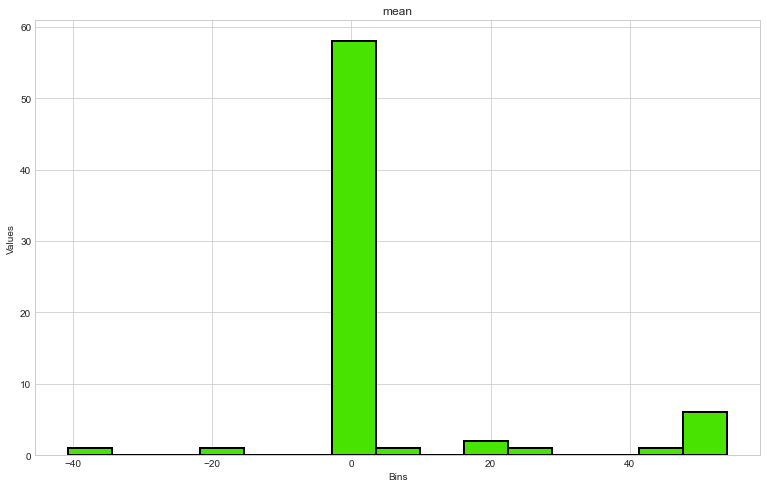

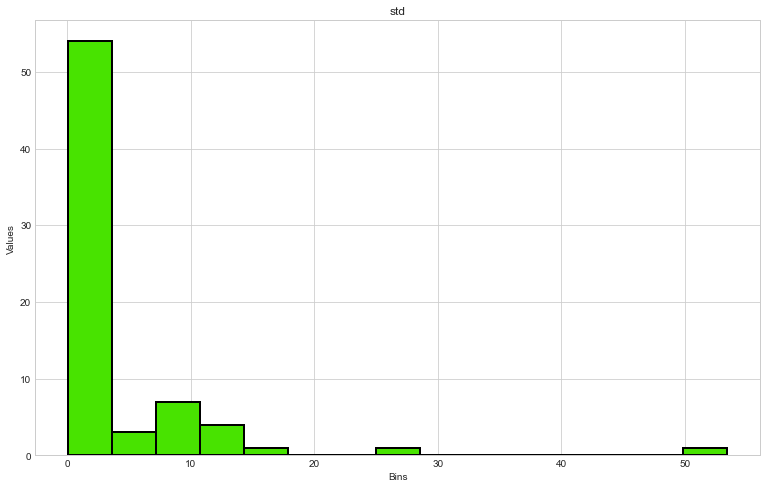

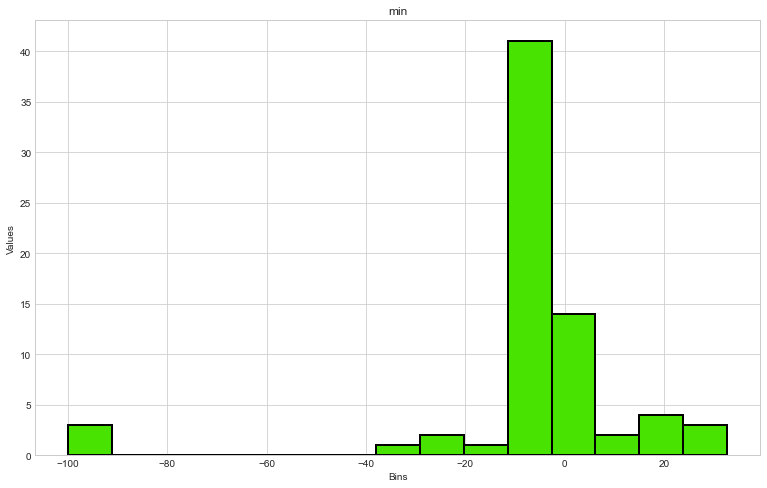

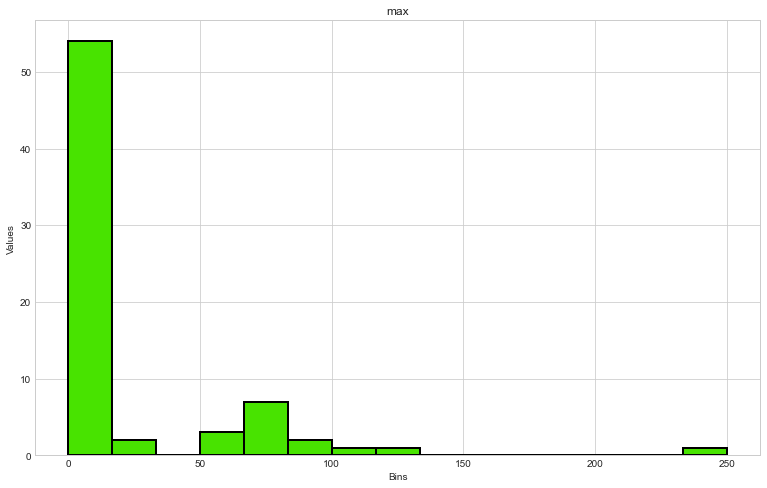

In [32]:
descdf = df.describe().T
descol = ['mean','std','min','max']
for col in descol:
    plt.figure(figsize=(13,8)) # Make it 14x7 inch
    plt.style.use('seaborn-whitegrid') # nice and clean grid
    plt.hist(descdf[col], bins=15, facecolor = '#48e300', edgecolor='#000000', linewidth=2)
    plt.title(col) 
    plt.xlabel('Bins') 
    plt.ylabel('Values') 
    plt.show()


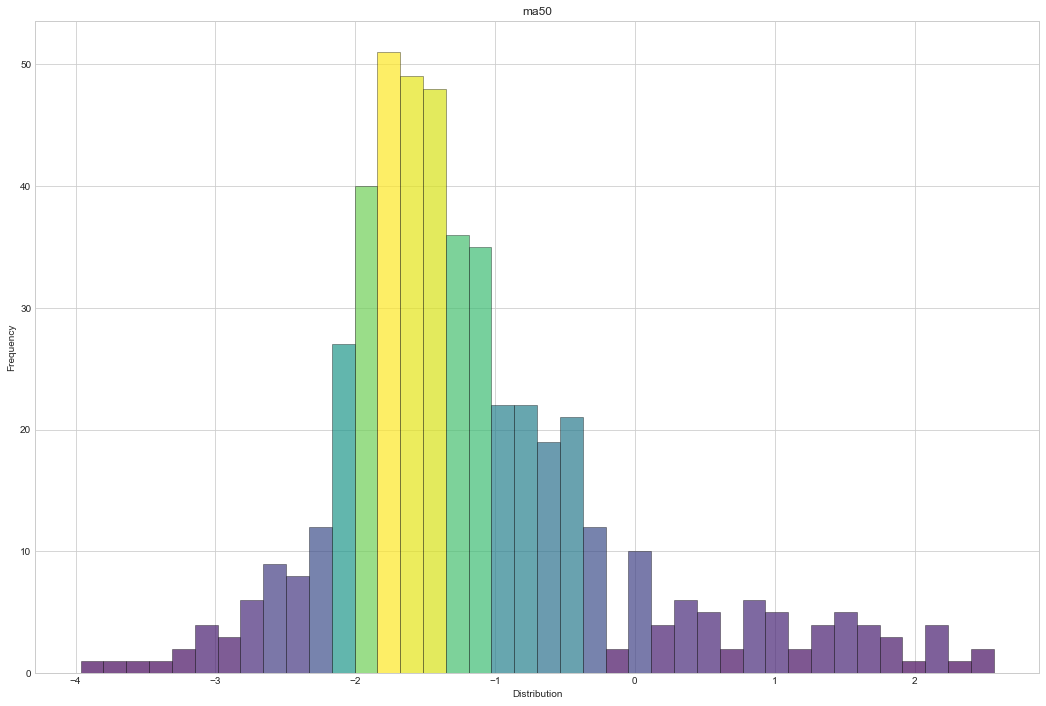

In [44]:
cols = df.columns
for col in cols:
    plt.figure(figsize=(18,12)) 
    plt.style.use('seaborn-whitegrid')
    n, bins, patches = plt.hist(df['ma50'], bins=40, facecolor='#000000', edgecolor='#000000', linewidth=0.5, alpha=0.7)
    n = n.astype('int')
    for i in range(len(patches)):
        patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))    

    plt.title('ma50', fontsize=12)
    plt.xlabel('Distribution', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.show()

Unnamed: 0


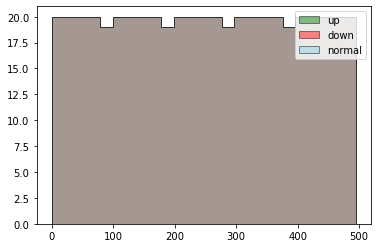

Open


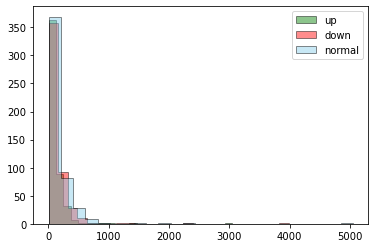

High


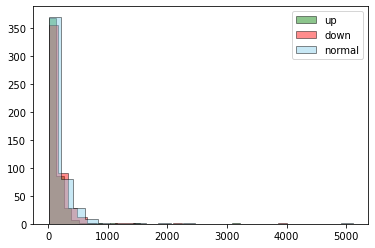

Low


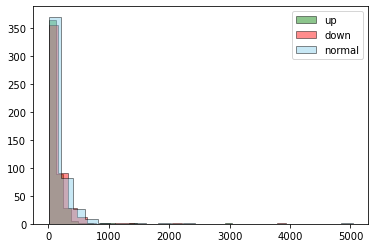

Close


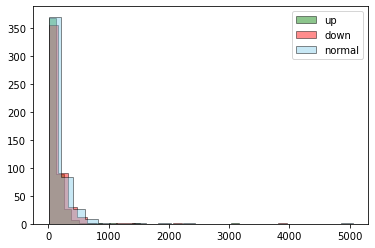

Volume


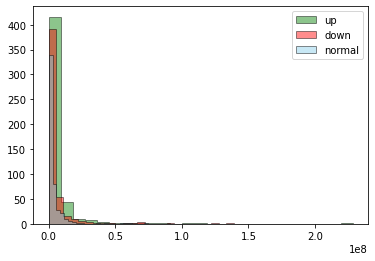

Dividends


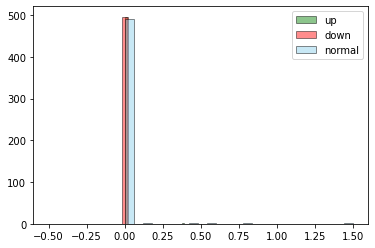

ma50


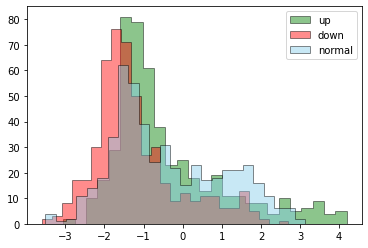

ma200


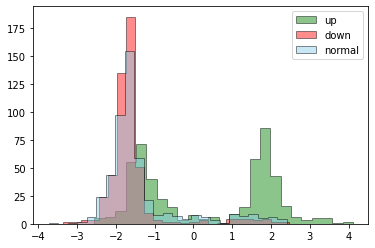

ADX


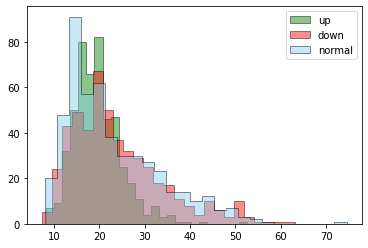

ADXR


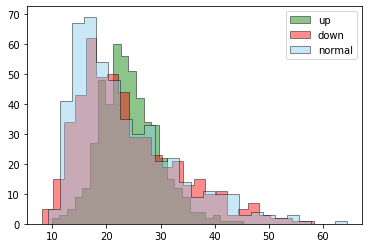

AROONOSC


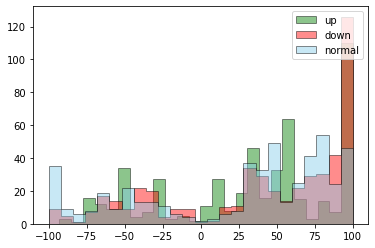

DX


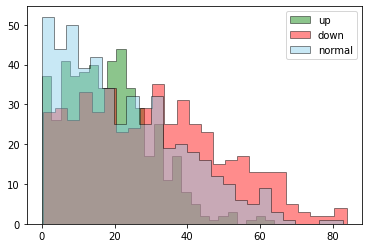

PPO


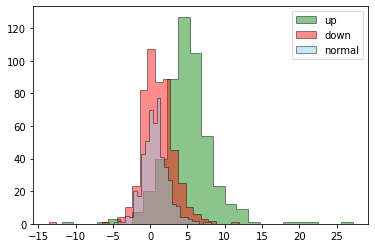

stochK


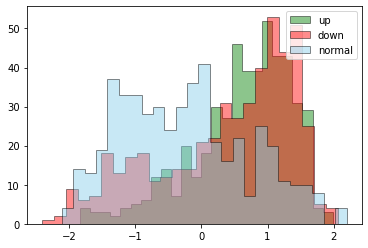

stochD


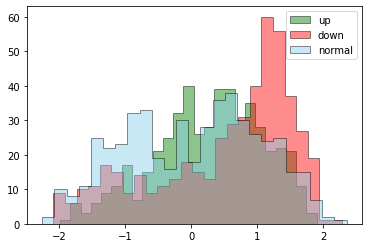

TRIX


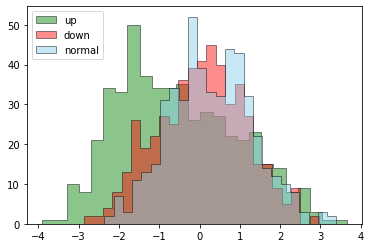

ULTOSC


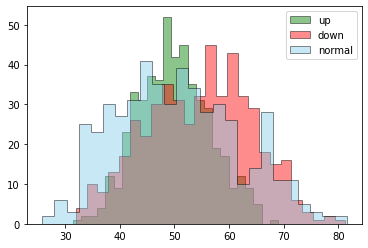

MACD


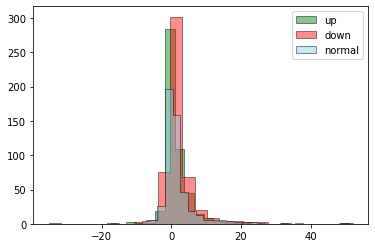

MACDSIG


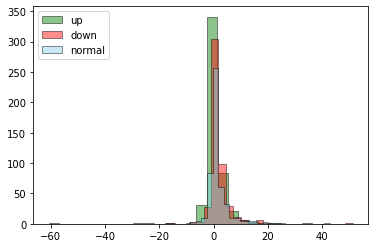

 MACDHIST


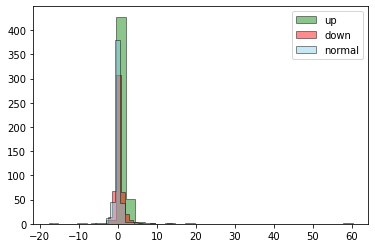

TRANGE


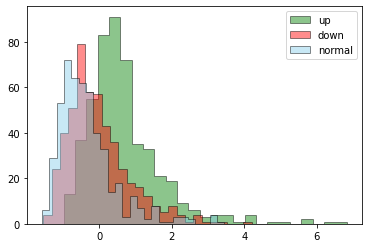

BBupperband


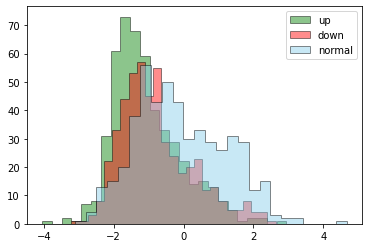

BBmiddleband


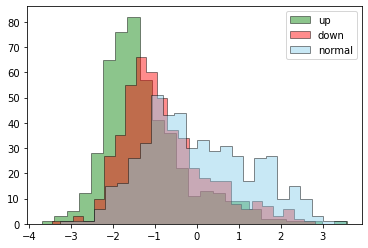

BBlowerband


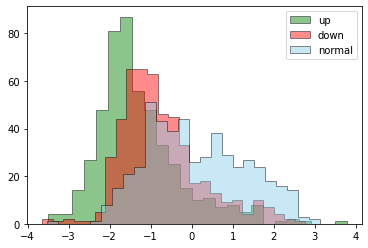

ao


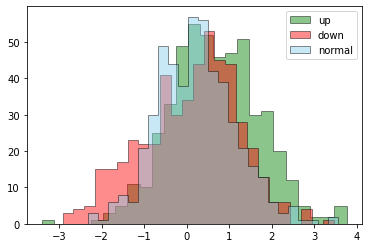

apo


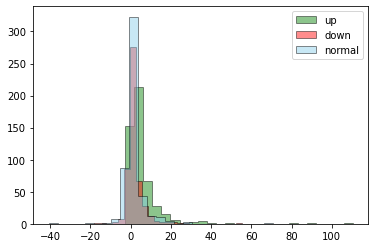

bias


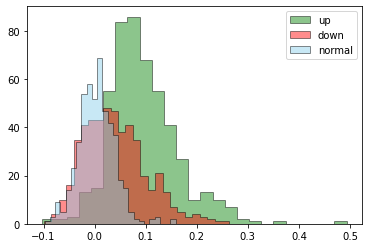

bop


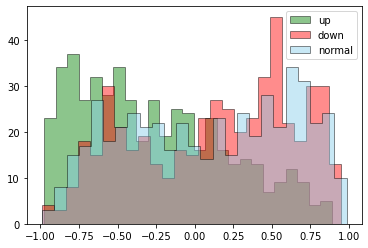

cci


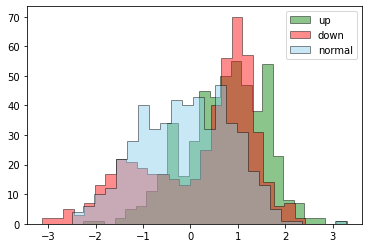

cfo


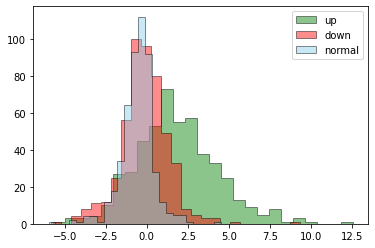

cmo


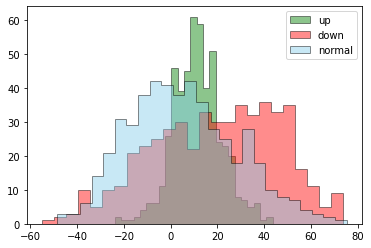

coppock


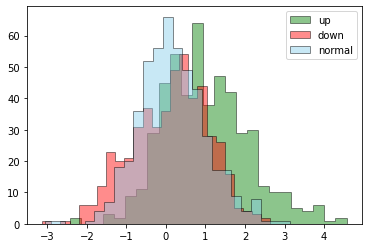

cti


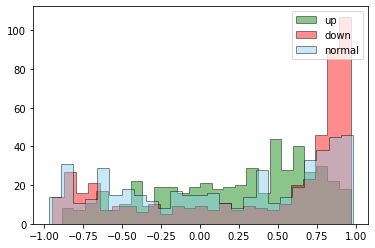

inertia


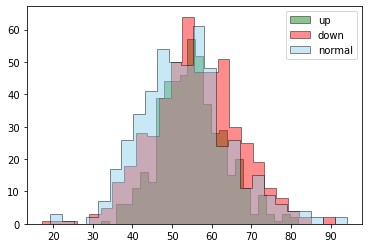

mom


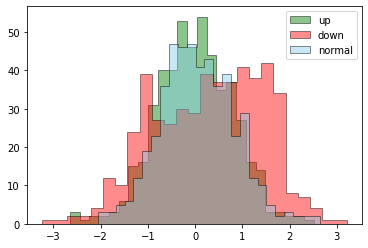

pgo


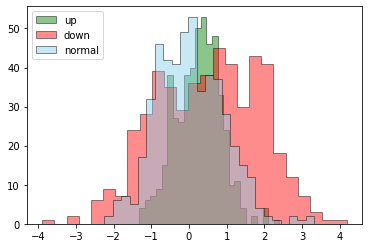

psl


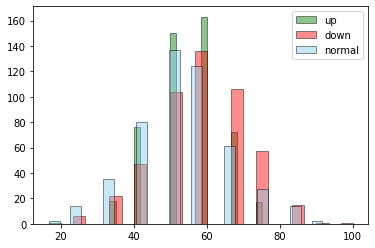

roc


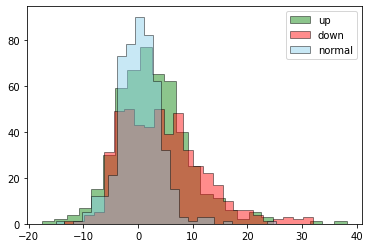

rsi


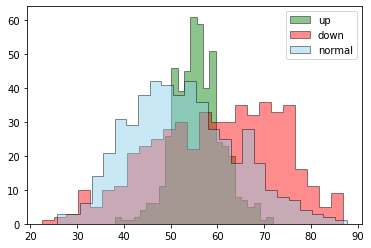

rsx


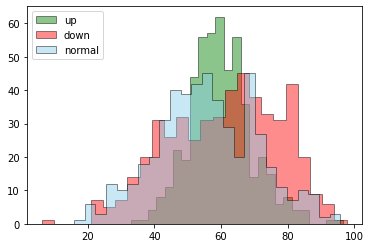

willr


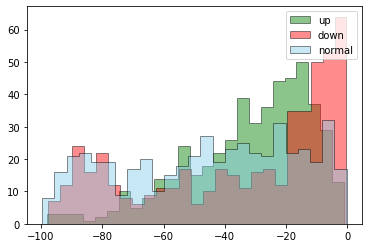

alma


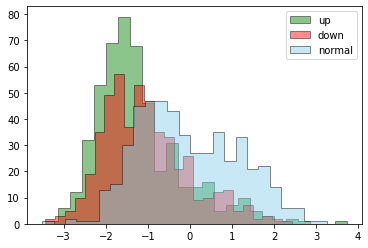

dema


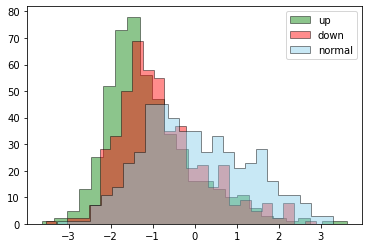

wma


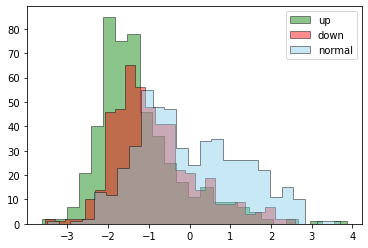

fwma


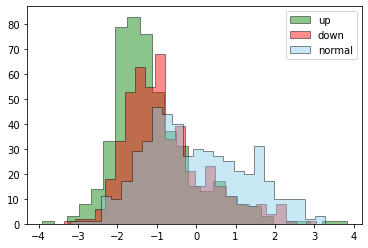

hma


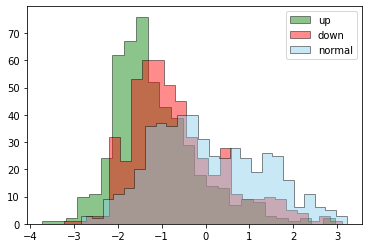

hwma


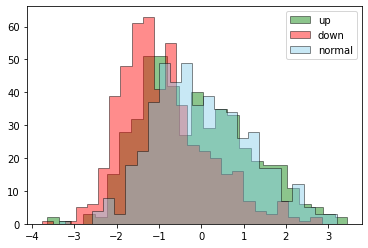

jma


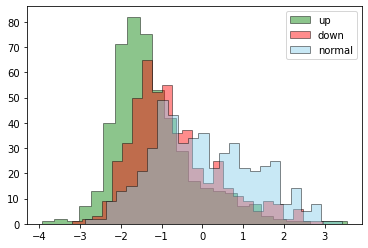

kama


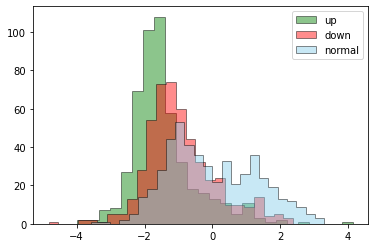

mcgd


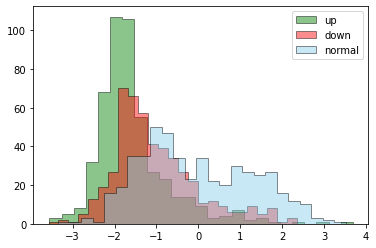

pwma


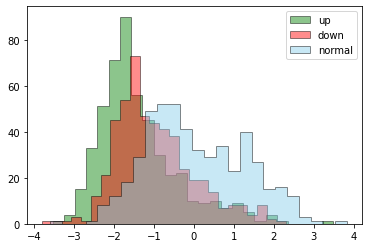

sinwma


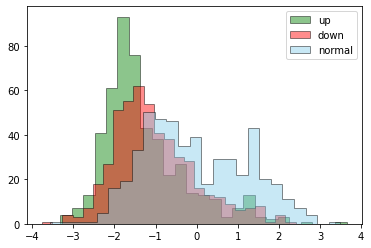

swma


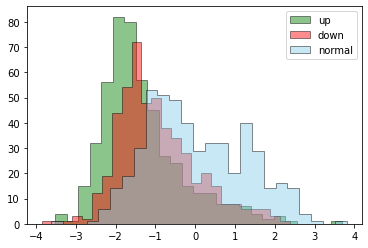

t3


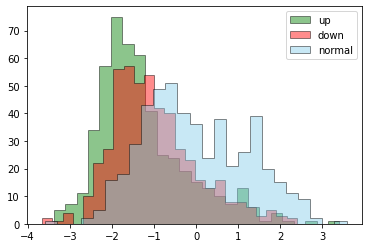

tema


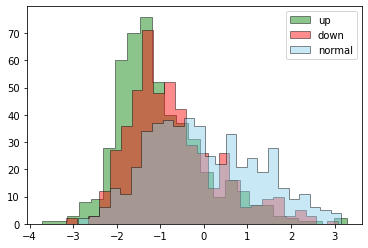

trima


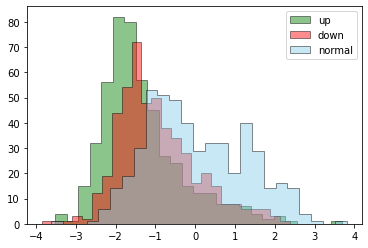

vidya


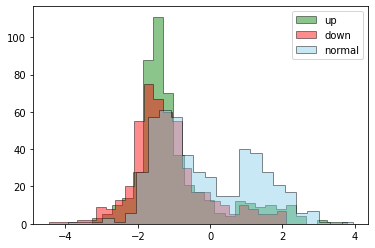

vwma


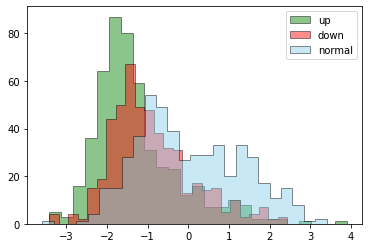

zlma


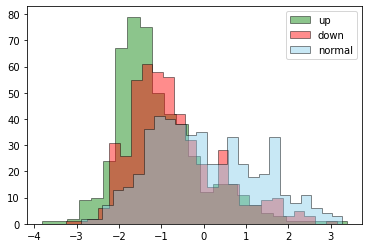

chop


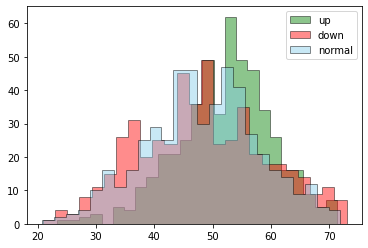

increasing


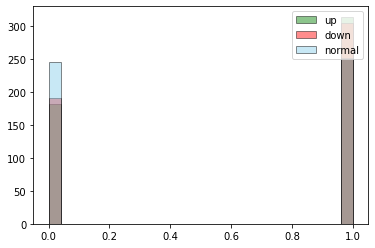

decreasing


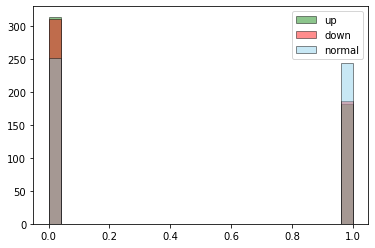

qstick


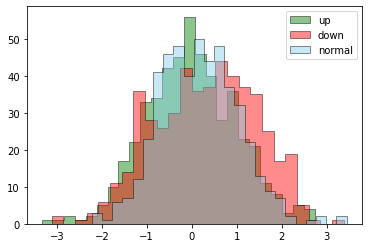

vhf


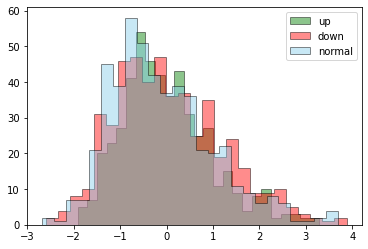

atr


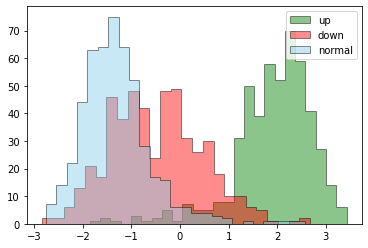

massi


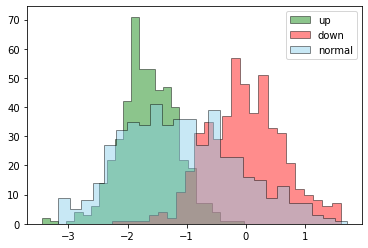

pdist


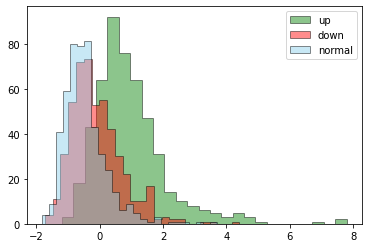

rvi


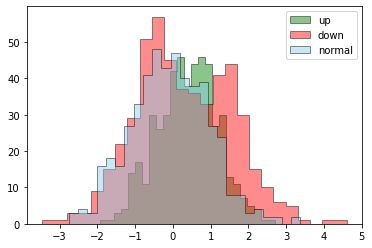

ui


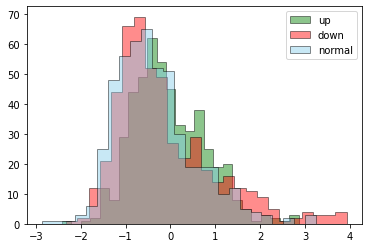

ad


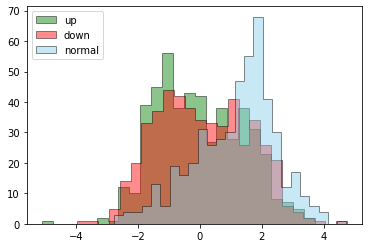

adosc


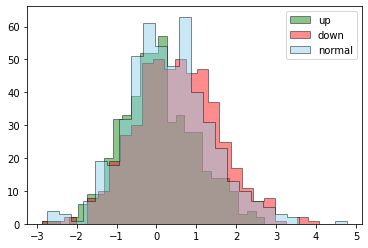

cmf


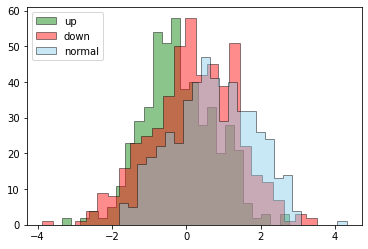

efi


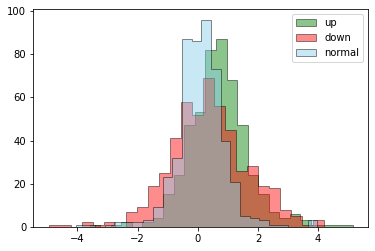

mfi


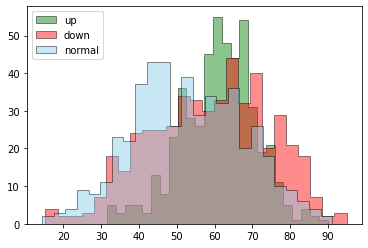

obv


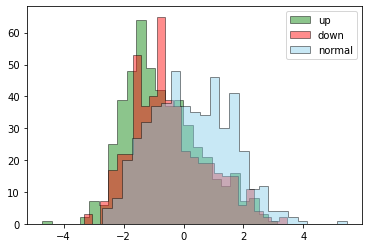

pvr


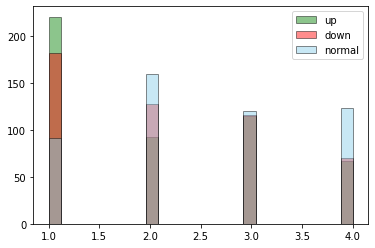

pvt


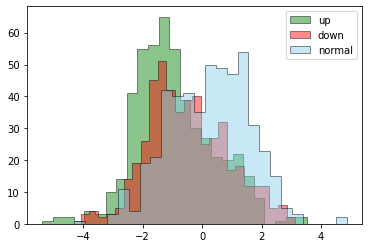

ebsw


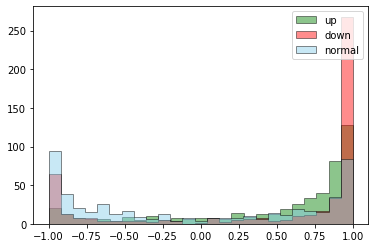

VIX


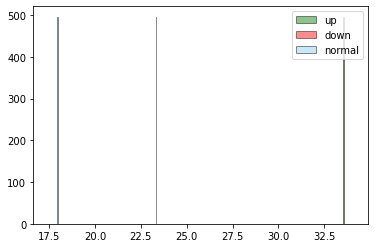

VVIX


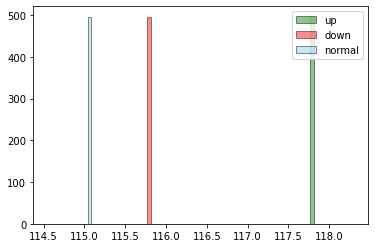

VXN


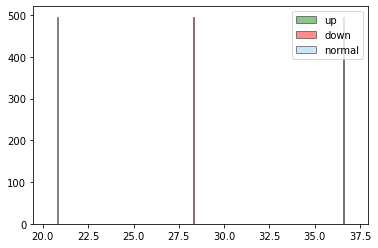

Market Cap


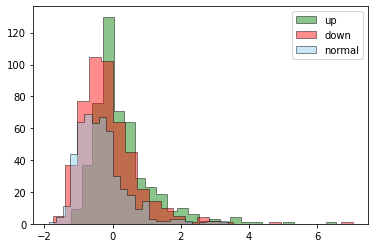

DPC


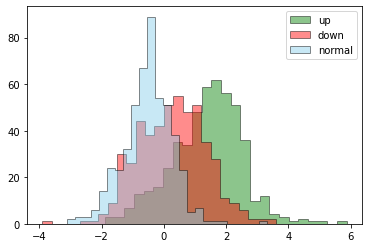

Cumulative Return


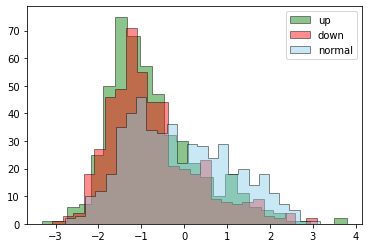

PriceUp


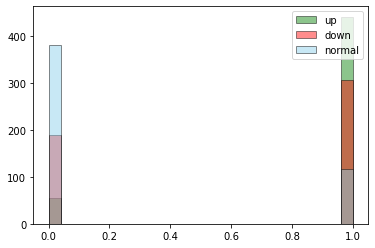

PriceDown


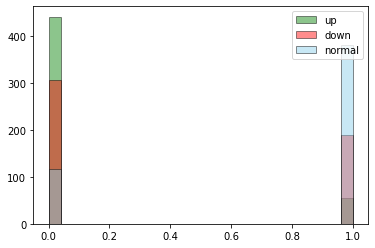

Close Change


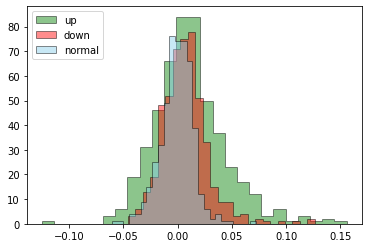

Target


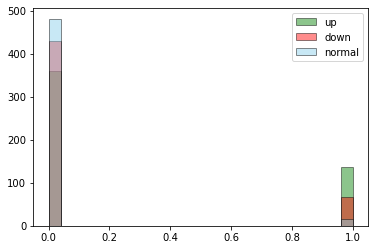

AD_difference


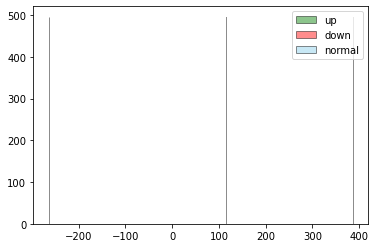

AD_RATIO


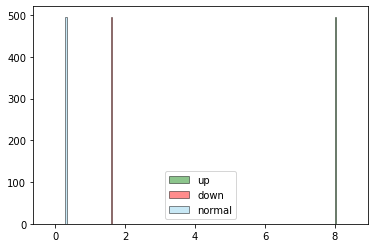

mcclellanSUM


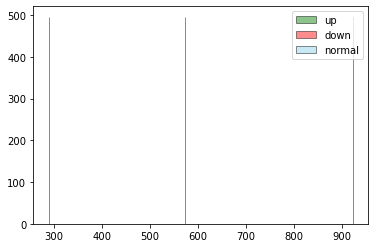

mcclellanOSC


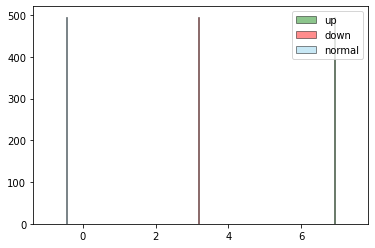

In [8]:
up_trend_df = pd.read_csv('./data/dates/2020-04-28.csv')
down_trend_df = pd.read_csv('./data/dates/2021-01-12.csv')
bearly_changed_df = pd.read_csv('./data/dates/2021-09-08.csv')
cols = up_trend_df.columns
cols = cols[:155]
for col in cols:
    if "CDL" not in col and "Date" not in col and "ticker" not in col:
        print(col)
        kwargs = dict(histtype='stepfilled', alpha=0.45, bins=25, lw = 1,edgecolor='k')
        plt.hist(up_trend_df[col], **kwargs, color = "green", label = "up")
        plt.hist(down_trend_df[col], **kwargs, color = "red", label = "down")
        plt.hist(bearly_changed_df[col], **kwargs, color = "skyblue", label = "normal")
        plt.legend()
        plt.show()

In [3]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

df = pd.read_csv('./data/dates/2021-02-04.csv')
cols = df.columns[:148]

dates_list,stocks_tickers = [],[]
d = {} 

for col in cols:
     if "CDL" not in col and "Date" not in col and "ticker" not in col and "Unnamed" not in col:
        d[col] = 0  
    
with open('./data/tickers.txt', 'r') as fp:
    for line in fp:
        x = line[:-1]
        stocks_tickers.append(x)
        
with open('./data/dates.txt', 'r') as fp:
    for line in fp:
        x = line[:-1]
        dates_list.append(x)
        
for date in dates_list:
    df = pd.read_csv(r'C:\Users\roeym\Desktop\data_backup\normaldist\dates_normdist_not_concatnated/'+ date + '.csv')
    for col in cols:
        if "CDL" not in col and "Date" not in col and "ticker" not in col and "Unnamed" not in col:
            d[col] += len(find_outliers_IQR(df[col]))

sorted_value_index = np.argsort(d.values())
dictionary_keys = list(d.keys())
sorted_dict = {dictionary_keys[i]: sorted(d.values())[i] for i in range(len(dictionary_keys))}

for key, value in sorted_dict.items():
    print(key, ':', value)



Open : 0
High : 0
Low : 0
Close : 915
Volume : 1604
Dividends : 1791
ma50 : 2323
ma200 : 2325
ADX : 2414
ADXR : 2414
AROONOSC : 2456
DX : 2492
PPO : 2571
stochK : 2715
stochD : 2802
TRIX : 3445
ULTOSC : 3463
MACD : 3946
MACDSIG : 3974
 MACDHIST : 4281
TRANGE : 4611
BBupperband : 4864
BBmiddleband : 5332
BBlowerband : 5710
ao : 5993
apo : 6112
bias : 6470
bop : 6646
cci : 6686
cfo : 7136
cmo : 7261
coppock : 7311
cti : 7374
inertia : 8148
mom : 8440
pgo : 8709
psl : 9145
roc : 9429
rsi : 9710
rsx : 9720
willr : 10000
alma : 10055
dema : 10099
wma : 10159
fwma : 10207
hma : 10249
hwma : 10288
jma : 10308
kama : 10322
mcgd : 10335
pwma : 10342
sinwma : 10383
swma : 10383
t3 : 10384
tema : 10414
trima : 10471
vidya : 11021
vwma : 11293
zlma : 11448
chop : 11558
increasing : 11617
decreasing : 11732
qstick : 11998
vhf : 12465
atr : 13078
massi : 13176
pdist : 14110
rvi : 14203
ui : 14411
ad : 16538
adosc : 17480
cmf : 17801
efi : 18597
mfi : 21446
obv : 21499
pvr : 24428
pvt : 24473
ebsw : 

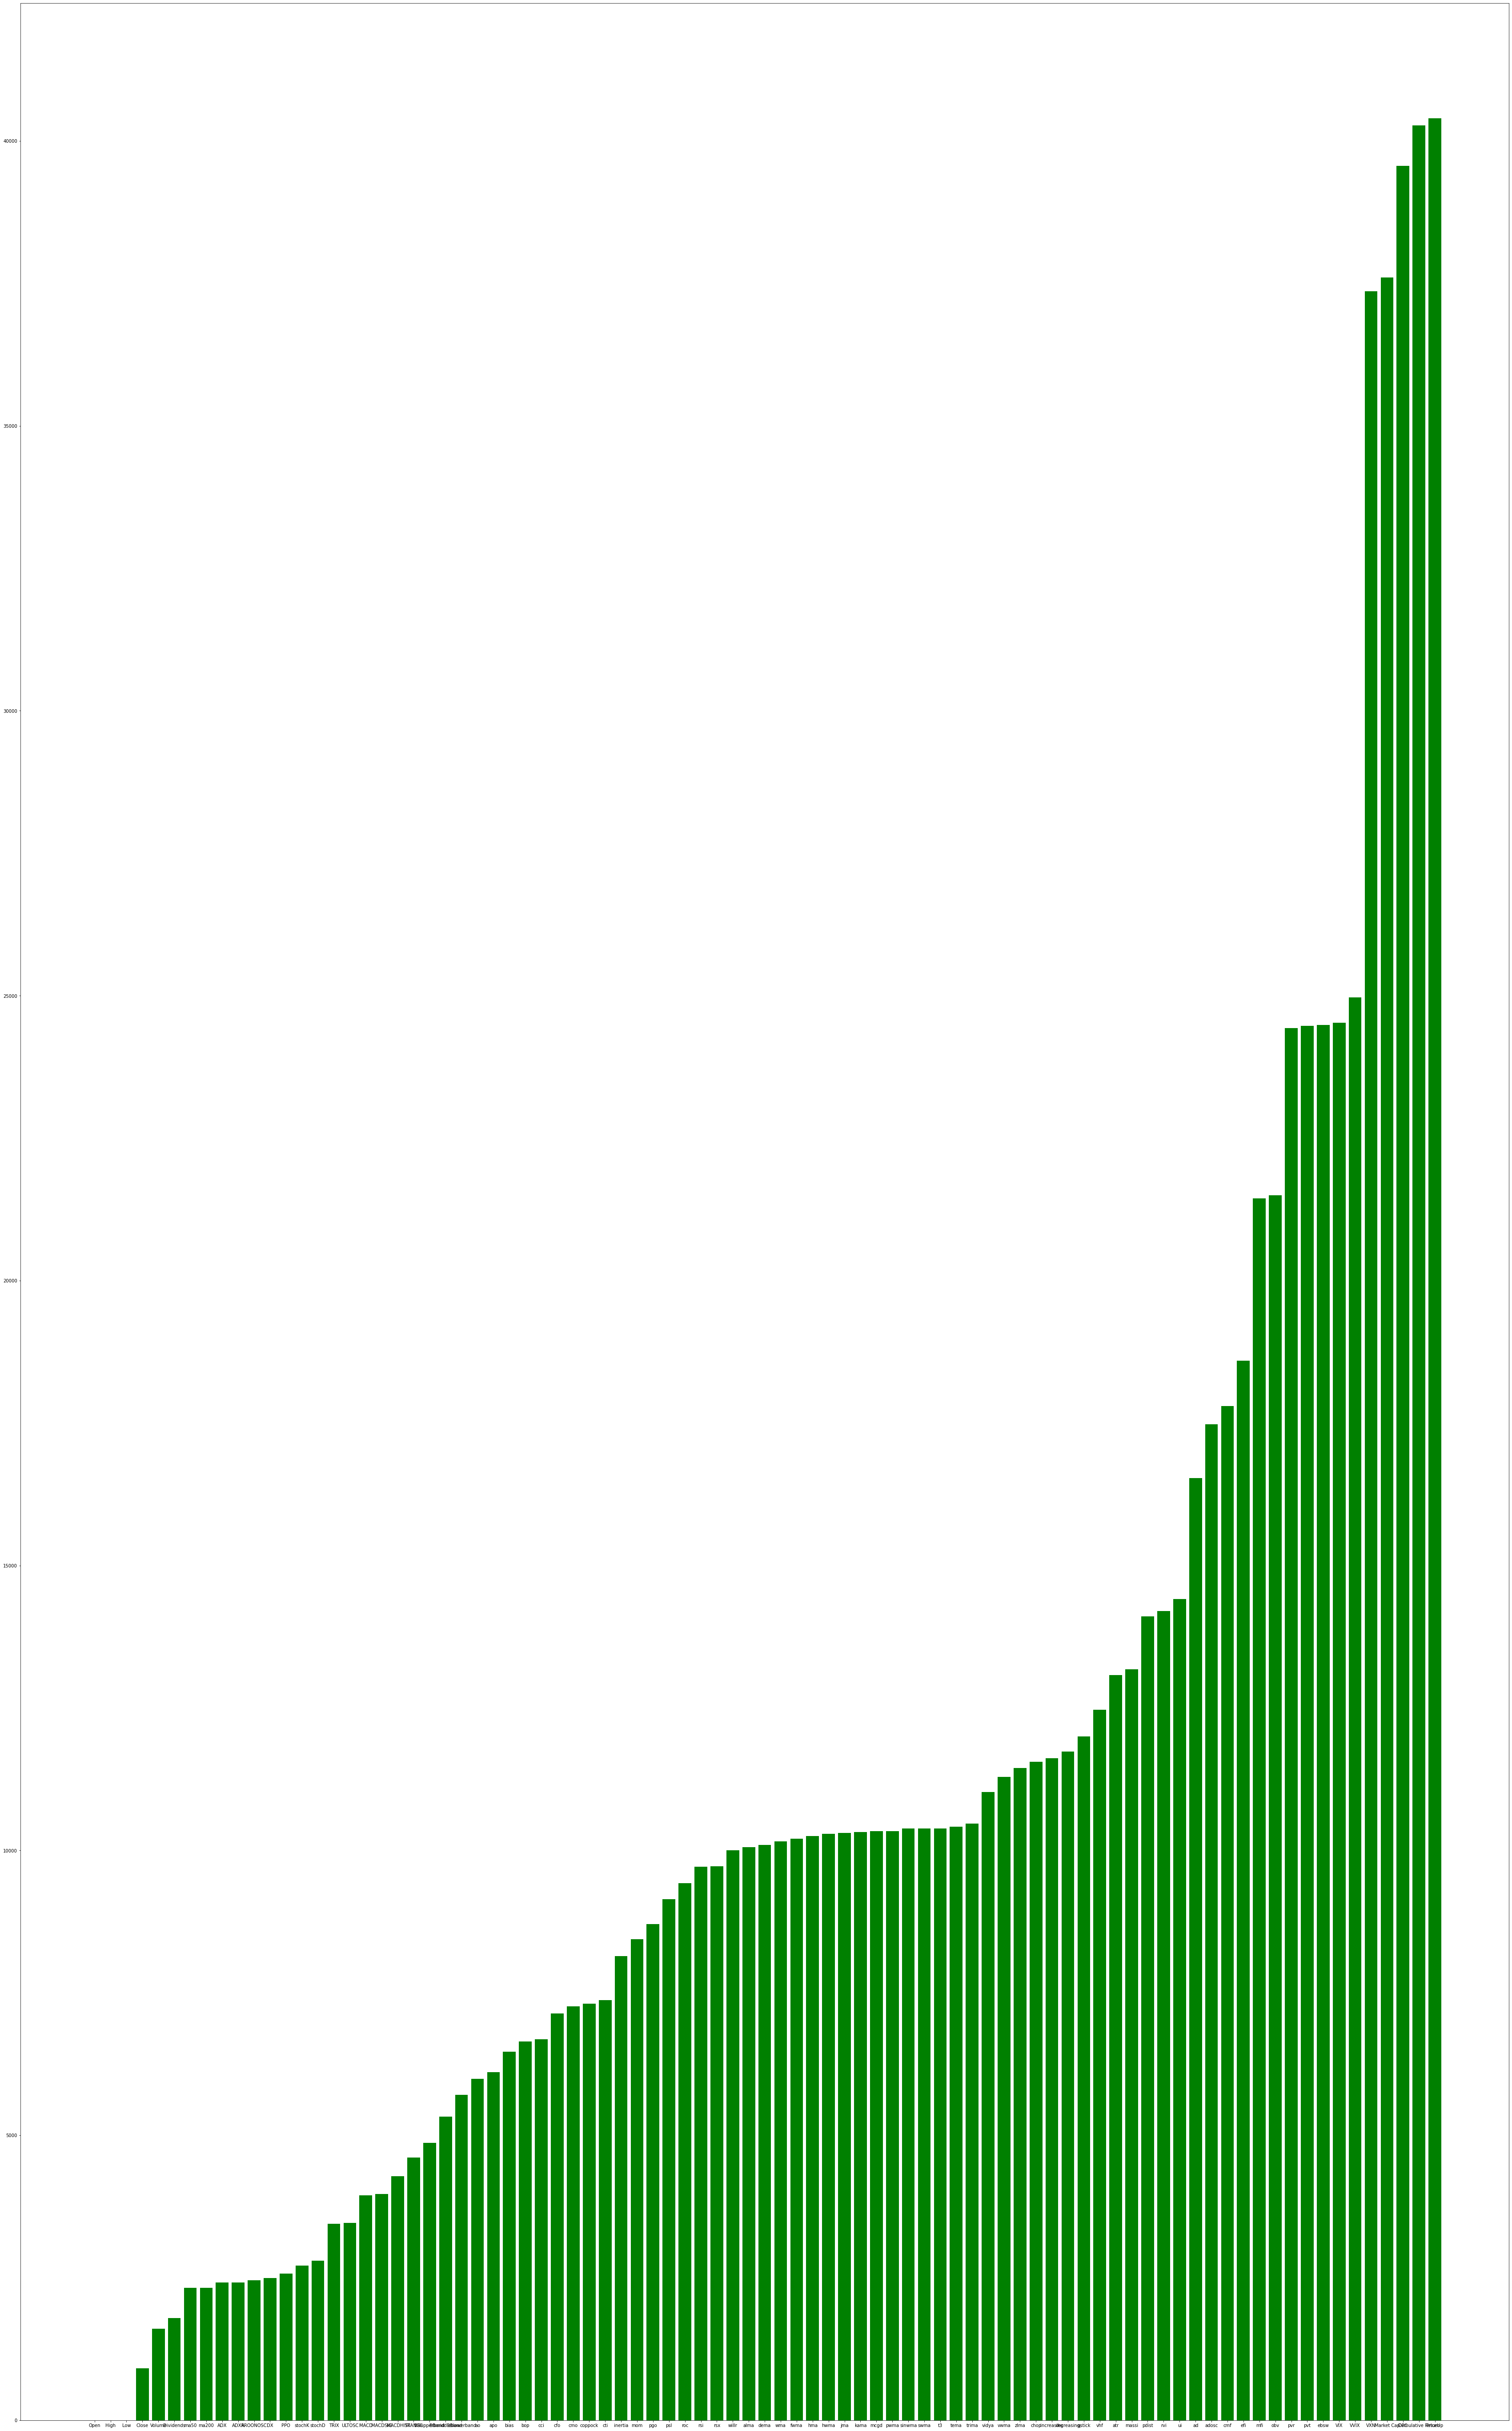

In [12]:
plt.bar(sorted_dict.keys(), sorted_dict.values(), color='g')
plt.rcParams["figure.figsize"] = (60,150)
plt.show()

In [30]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

df = pd.read_csv('./data/dates/2021-02-04.csv')
cols = df.columns[:148]

dates_list,stocks_tickers = [],[]
error_per_stock = {} 
with open('./data/tickers.txt', 'r') as fp:
    for line in fp:
        x = line[:-1]
        stocks_tickers.append(x)
        
for ticker in stocks_tickers:
    error_per_stock[ticker] = 0  
    

with open('./data/dates.txt', 'r') as fp:
    for line in fp:
        x = line[:-1]
        dates_list.append(x)
        
for date in dates_list:
    df = pd.read_csv(r'C:\Users\roeym\Desktop\data_backup\normaldist\dates_normdist_not_concatnated/'+ date + '.csv')
    for col in cols:
        if "CDL" not in col and "Date" not in col and "ticker" not in col and "Unnamed" not in col:
            outs = find_outliers_IQR(df[col]).axes
            ticks = df.iloc[outs[0]]['ticker'].tolist()
            for tick in ticks:
                error_per_stock[tick] = error_per_stock[tick] + 1 

            

for key, value in error_per_stock.items():
    print(key, ':', value)

KeyError: 'TMO'

In [22]:
import yfinance as yf
import numpy as np
stocks_betas = {}    
tickers = []
with open('./data/tickers.txt', 'r') as fp:
    for line in fp:
        x = line[:-1]
        tickers.append(x)        
tickers.append('^GSPC') 
data = yf.download(tickers, period='5y', interval='1mo')['Adj Close'] 
data = data.dropna(how='all')

log_returns = np.log(data / data.shift())
cov = log_returns.cov()
var = log_returns['^GSPC'].var()
for tick in tickers:
    stocks_betas[tick] = cov.loc[tick, '^GSPC'] / var


[*********************100%***********************]  497 of 497 completed


In [23]:
from collections import defaultdict

dd = defaultdict(list)

for dt in (error_per_stock, stocks_betas): 
    for key, value in dt.items():
        dd[key].append(value)
        


In [28]:
ds = {k: v for k, v in sorted(dd.items(), key=lambda item: item[1])}
for key, value in ds.items():
    print(key, ':', value)



^GSPC : [0.9999999999999993]
MET : [170, 1.0280970492101689]
EMR : [181, 1.4105981645769168]
AME : [185, 1.2032574986092859]
ETN : [194, 1.151639994796154]
AFL : [195, 0.8821281269579248]
PRU : [213, 1.397451084825933]
DOV : [236, 1.3437826103329045]
TFC : [247, 1.1291532289505548]
APH : [249, 1.2357410708652983]
TEL : [255, 1.3062543367055575]
CBRE : [256, 1.424776340422466]
L : [265, 0.8475647044023876]
PFG : [278, 1.2599469593086365]
PAYX : [285, 0.990666122811271]
FITB : [295, 1.339819840068976]
RJF : [300, 1.0813168679868757]
PNC : [309, 1.1700748296673078]
LNC : [309, 1.8420042212405798]
HON : [310, 1.0486427061272976]
AIG : [316, 1.3187828934620662]
GPC : [321, 0.9659266632911931]
CFG : [328, 1.4025062745696955]
TRMB : [328, 1.5759835808952505]
EMN : [334, 1.5344739874890487]
MMC : [335, 0.8933523164761937]
PNR : [342, 1.1101888935027113]
TXT : [344, 1.5667995657298508]
ITW : [345, 1.1056516720822145]
CE : [351, 1.301593274132705]
WM : [358, 0.7508204564137756]
JCI : [359, 1.239

In [8]:

import numpy as np
import datetime as dt
from scipy.stats import norm
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import datetime as dt

def add(self, key, value):
    self[key] = value
def get_var(initial_investment, weights, tickers):
    data = pdr.get_data_yahoo(tickers, start="2018-01-01", end=dt.date.today())['Close']
    returns = data.pct_change()
    cov_matrix = returns.cov()
    avg_rets = returns.mean()
    port_mean = avg_rets.dot(weights)
    port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
    mean_investment = (1 + port_mean) * initial_investment
    stdev_investment = initial_investment * port_stdev
    conf_level1 = 0.05
    cutoff1 = norm.ppf(conf_level1, mean_investment, stdev_investment)
    var_1d1 = initial_investment - cutoff1
    return var_1d1
    
tickers = ['AAPL','FB']
var_dict = {}
for ticker in tickers:
    var_dict[ticker] = 0  
    
# with open('tickers.txt', 'r') as fp:
#     for line in fp:
#         x = line[:-1]
#         tickers.append(x)
# weights = np.array([.25, .3, .15, .3])
weights = np.array([1])
initial_investment = 1000000
for tick in tickers:
    var_dict.add(get_var(initial_investment, weights, [ticker]), tick)
    
    var_dict = sorted(var_dict.items(), key=lambda x:x[1])

print(var_dict)

AttributeError: 'dict' object has no attribute 'add'